## ***Soal Praktikum - Mawan***

### ***Wine Dataset***

#### ***Data preparation - Wine***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier

In [ ]:
from sklearn.datasets import load_wine
wine = load_wine()
df_wine = pd.DataFrame(data=np.c_[wine['data'],wine['target']],columns=wine['feature_names']+['target'])
df_wine

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2.0


#### ***Data preprocessing***

In [ ]:
(df_wine.isnull() | df_wine.empty | df_wine.isna()).sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [ ]:
df_wine.duplicated().sum()

0

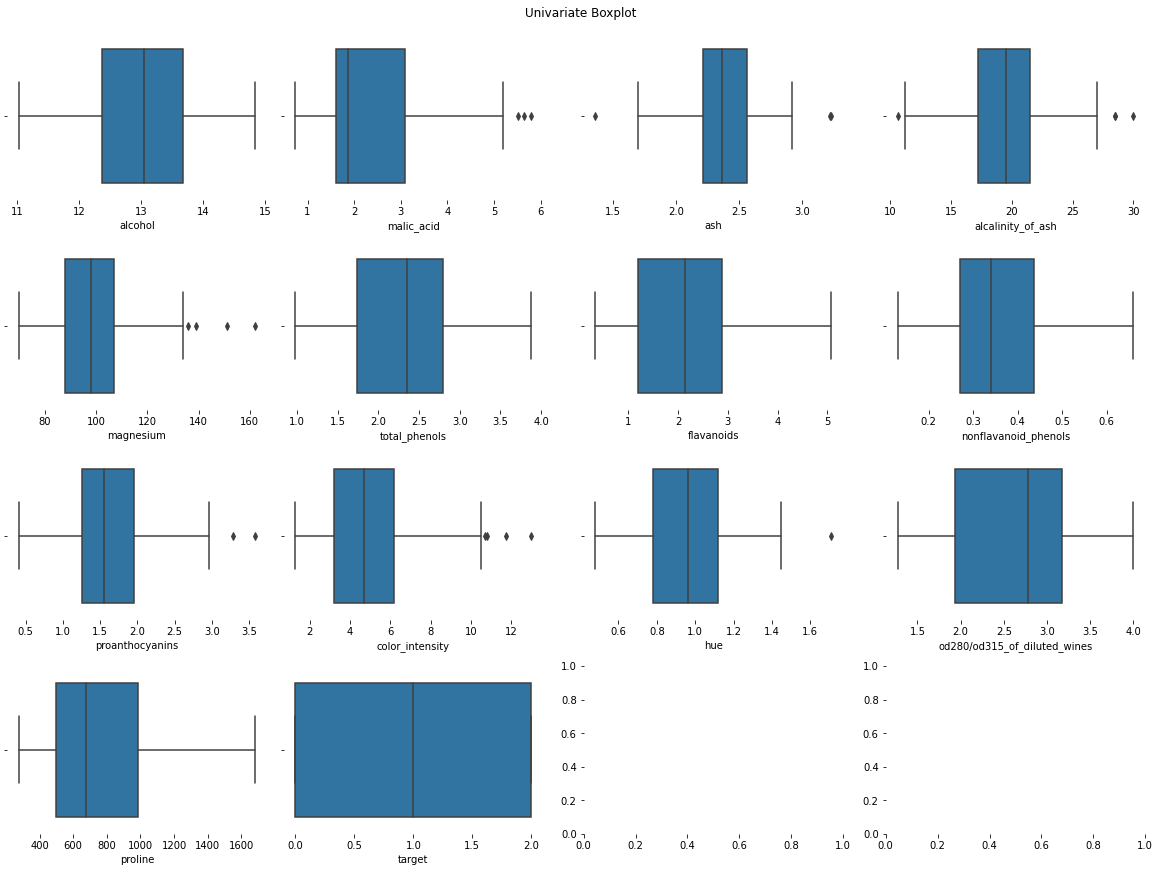

In [ ]:
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(16, 12), constrained_layout=True)
plt.suptitle("Univariate Boxplot")
ax = ax.flatten()
colbox = df_wine.describe()
for i, j in enumerate(colbox):
    sns.set_style("darkgrid")
    sns.boxplot(x=df_wine[j], ax=ax[i])
    sns.despine(left=True, bottom=True)

In [ ]:
def handling_outlier(df, value):
  column = value
  for i in column:
    Q1 = df[i].quantile(.25)
    Q3 = df[i].quantile(.75)
    IQR = Q3 - Q1

    df[i] = df[i].mask(((df[i] > (Q3+(1.5*IQR)))), (Q3+(1.5*IQR)))
    df[i] = df[i].mask(((df[i] < (Q1-(1.5*IQR)))), (Q1-(1.5*IQR)))
  
  return df[i]

handling_outlier(df_wine, 
                 ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline'])

0      1065.0
1      1050.0
2      1185.0
3      1480.0
4       735.0
        ...  
173     740.0
174     750.0
175     835.0
176     840.0
177     560.0
Name: proline, Length: 178, dtype: float64

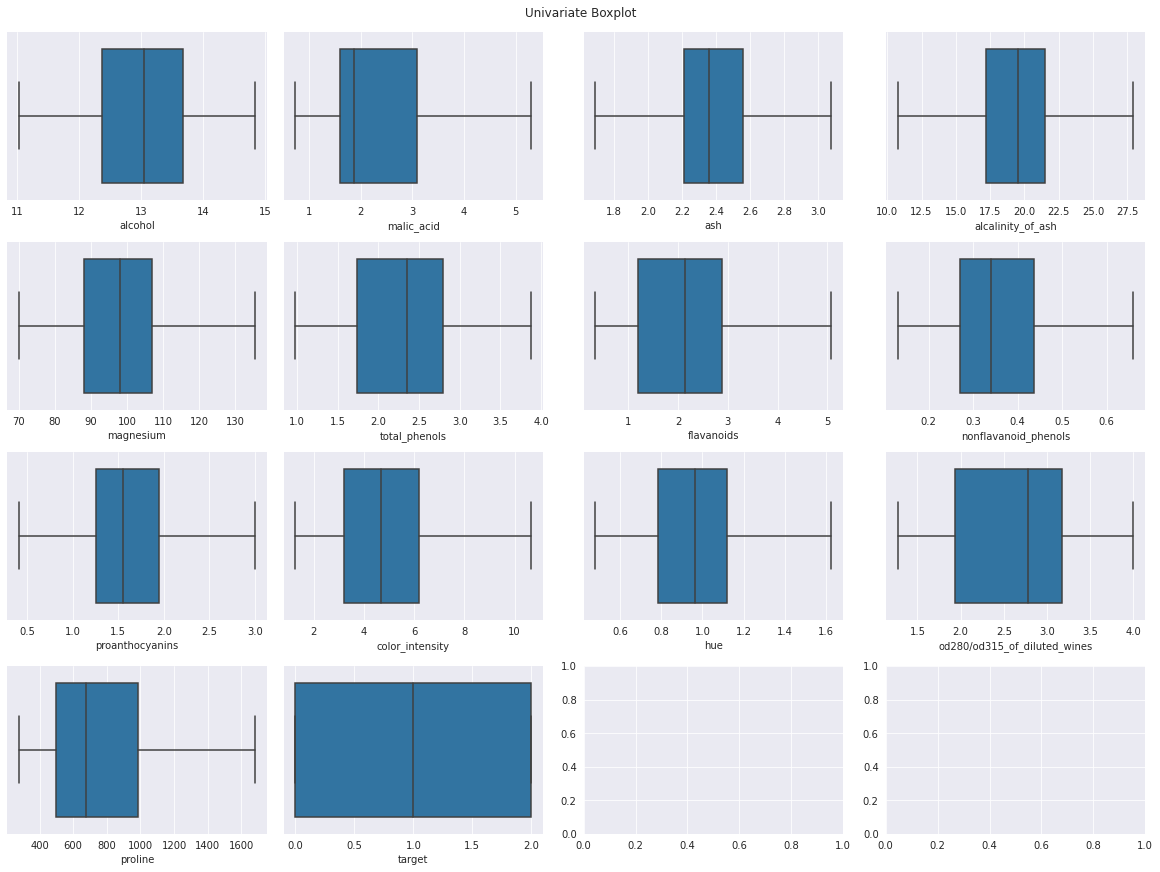

In [ ]:
# check outlier with boxplot
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(16, 12), constrained_layout=True)
plt.suptitle("Univariate Boxplot")
ax = ax.flatten()
colbox = df_wine.describe()
for i, j in enumerate(colbox):
    sns.set_style("darkgrid")
    sns.boxplot(x=df_wine[j], ax=ax[i])
    sns.despine(left=True, bottom=True)

df_wine merupakan dataset numerik jadi tidak memerlukan preprocessing feature encoding. sehingga bisa langsung dipakai.

In [ ]:
df_wine

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.7100,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.7800,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.3600,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.9500,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.5900,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.3025,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2.0
174,13.40,3.9100,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2.0
175,13.27,4.2800,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2.0
176,13.17,2.5900,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2.0


In [ ]:
# Scaling
from sklearn.preprocessing import MinMaxScaler

df_copy = df_wine.copy()
columns = list(df_copy.iloc[:, :-1].columns)

sc = MinMaxScaler()
sc.fit(df_copy[columns])
df_copy_scaled = sc.transform(df_copy[columns])
df_copy.iloc[:, :-1] = df_copy_scaled
df_wine_scaled = df_copy
df_wine_scaled

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,0.842105,0.212603,0.533273,0.281977,0.870229,0.627586,0.573840,0.283019,0.725869,0.464324,0.488550,0.970696,0.561341,0.0
1,0.571053,0.227945,0.324640,0.026163,0.458015,0.575862,0.510549,0.245283,0.335907,0.330138,0.497274,0.780220,0.550642,0.0
2,0.560526,0.355068,0.705935,0.456395,0.473282,0.627586,0.611814,0.320755,0.926641,0.468584,0.479826,0.695971,0.646933,0.0
3,0.878947,0.265205,0.583633,0.351744,0.656489,0.989655,0.664557,0.207547,0.683398,0.694356,0.331516,0.798535,0.857347,0.0
4,0.581579,0.405479,0.849820,0.595930,0.732824,0.627586,0.495781,0.490566,0.544402,0.323749,0.488550,0.608059,0.325963,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.705263,1.000000,0.547662,0.566860,0.381679,0.241379,0.056962,0.735849,0.250965,0.683706,0.139586,0.172161,0.329529,2.0
174,0.623684,0.694795,0.569245,0.712209,0.488550,0.282759,0.086498,0.566038,0.386100,0.641108,0.191930,0.106227,0.336662,2.0
175,0.589474,0.775890,0.410971,0.537791,0.763359,0.210345,0.073840,0.566038,0.362934,0.949947,0.095965,0.106227,0.397290,2.0
176,0.563158,0.405479,0.490108,0.537791,0.763359,0.231034,0.071730,0.754717,0.405405,0.854100,0.104689,0.128205,0.400856,2.0


#### ***Modelling***

In [ ]:
def PerceptronModelClassifier(X, Y, test):
  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = test, random_state = 42)
  ppn = Perceptron(eta0=0.1, random_state=42)
  ppn.fit(X_train, y_train)
  y_pred = ppn.predict(X_test)
  print(f"Accuracy with test size {test} : {accuracy_score(y_test, y_pred):.3f}")

In [ ]:
def BaggingModelClassifier(X, Y, estimator):
  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)
  ppn = Perceptron(eta0=0.1, random_state=42)
  bc = BaggingClassifier(base_estimator=ppn, n_estimators=estimator, n_jobs=-1)
  bc.fit(X_train, y_train)
  y_pred = bc.predict(X_test)
  print(f"Accuracy with n_estimator {estimator} : {accuracy_score(y_test, y_pred):.3f}")

#### ***Evaluasi***

##### ***Perceptron***

In [ ]:
# Perceptron
X = df_wine_scaled.drop(['target'], axis = 1)
Y = df_wine_scaled['target']
PerceptronModelClassifier(X, Y, 0.2)
PerceptronModelClassifier(X, Y, 0.3)
PerceptronModelClassifier(X, Y, 0.4)

Accuracy with test size 0.2 : 1.000
Accuracy with test size 0.3 : 0.981
Accuracy with test size 0.4 : 0.986


##### ***Bagging***

In [ ]:
# Bagging
X = df_wine_scaled.drop(['target'], axis = 1)
Y = df_wine_scaled['target']
BaggingModelClassifier(X, Y, 100)
BaggingModelClassifier(X, Y, 200)
BaggingModelClassifier(X, Y, 300)

Accuracy with n_estimator 100 : 0.981
Accuracy with n_estimator 200 : 1.000
Accuracy with n_estimator 300 : 0.963


### ***Breast Cancer Dataset***

#### ***Data preparation - Breast Cancer***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier

#### ***Data preprocessing***

In [ ]:
from sklearn.datasets import load_breast_cancer
breast_cancer = load_breast_cancer()
df_data = pd.DataFrame(breast_cancer['data'], columns=breast_cancer.feature_names)
df_class = pd.DataFrame(breast_cancer['target'], columns=['target'])
df_breast_cancer = pd.concat((df_data, df_class),axis=1)
df_breast_cancer

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [ ]:
(df_breast_cancer.isnull() | df_breast_cancer.empty | df_breast_cancer.isna()).sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [ ]:
df_breast_cancer.duplicated().sum()

0

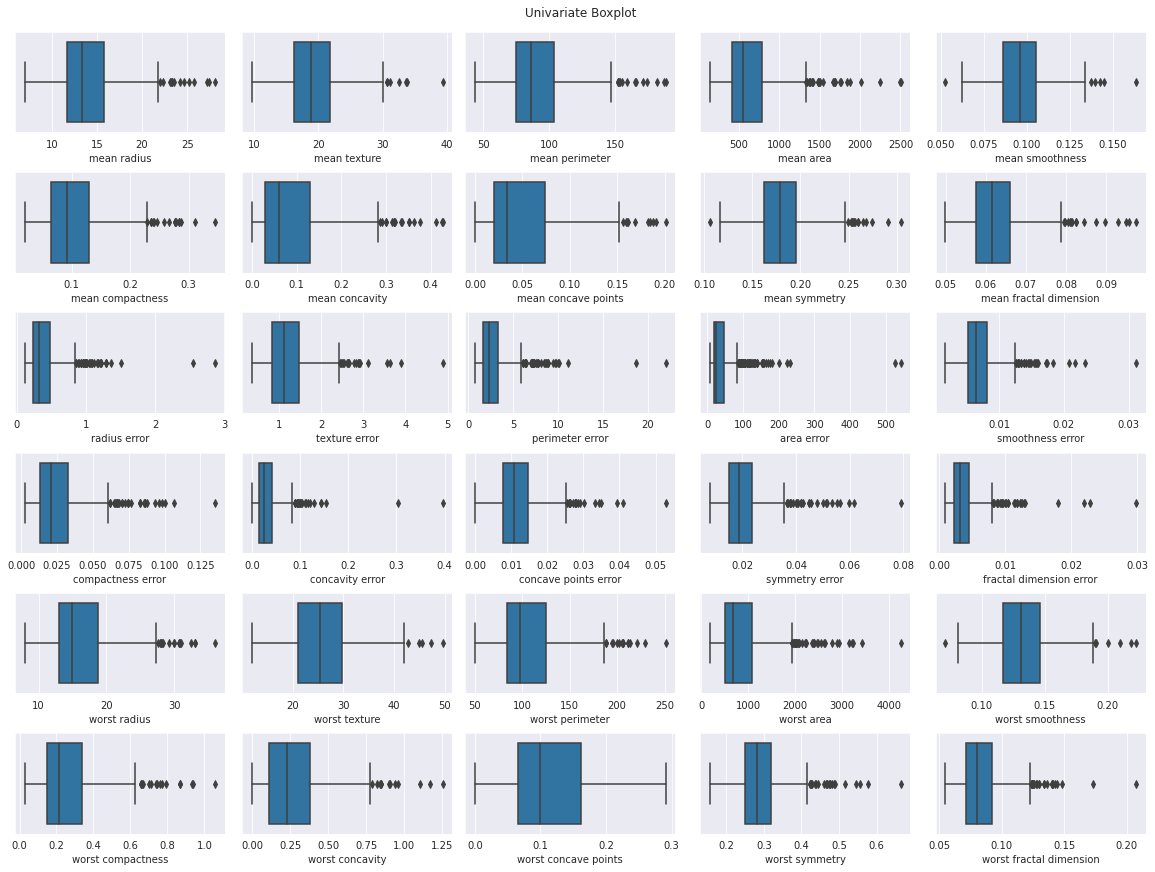

In [ ]:
fig, ax = plt.subplots(nrows=6, ncols=5, figsize=(16, 12), constrained_layout=True)
plt.suptitle("Univariate Boxplot")
ax = ax.flatten()
colbox = df_breast_cancer.iloc[:, :30]
for i, j in enumerate(colbox):
    sns.boxplot(x=df_breast_cancer[j], ax=ax[i])

In [ ]:
def handling_outlier(df, value):
  column = value
  for i in column:
    Q1 = df[i].quantile(.25)
    Q3 = df[i].quantile(.75)
    IQR = Q3 - Q1

    df[i] = df[i].mask(((df[i] > (Q3+(1.5*IQR)))), (Q3+(1.5*IQR)))
    df[i] = df[i].mask(((df[i] < (Q1-(1.5*IQR)))), (Q1-(1.5*IQR)))
  
  return df[i]

handling_outlier(df_breast_cancer, 
                 ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 
                  'mean smoothness', 'mean compactness', 'mean concavity', 
                  'mean concave points', 'mean symmetry', 'mean fractal dimension', 
                  'radius error', 'texture error', 'perimeter error', 'area error', 
                  'smoothness error', 'compactness error', 'concavity error', 
                  'concave points error', 'symmetry error', 'fractal dimension error', 
                  'worst radius', 'worst texture', 'worst perimeter', 'worst area', 
                  'worst smoothness', 'worst compactness', 'worst concavity', 
                  'worst concave points', 'worst symmetry', 'worst fractal dimension'])

0      0.11890
1      0.08902
2      0.08758
3      0.12301
4      0.07678
        ...   
564    0.07115
565    0.06637
566    0.07820
567    0.12301
568    0.07039
Name: worst fractal dimension, Length: 569, dtype: float64

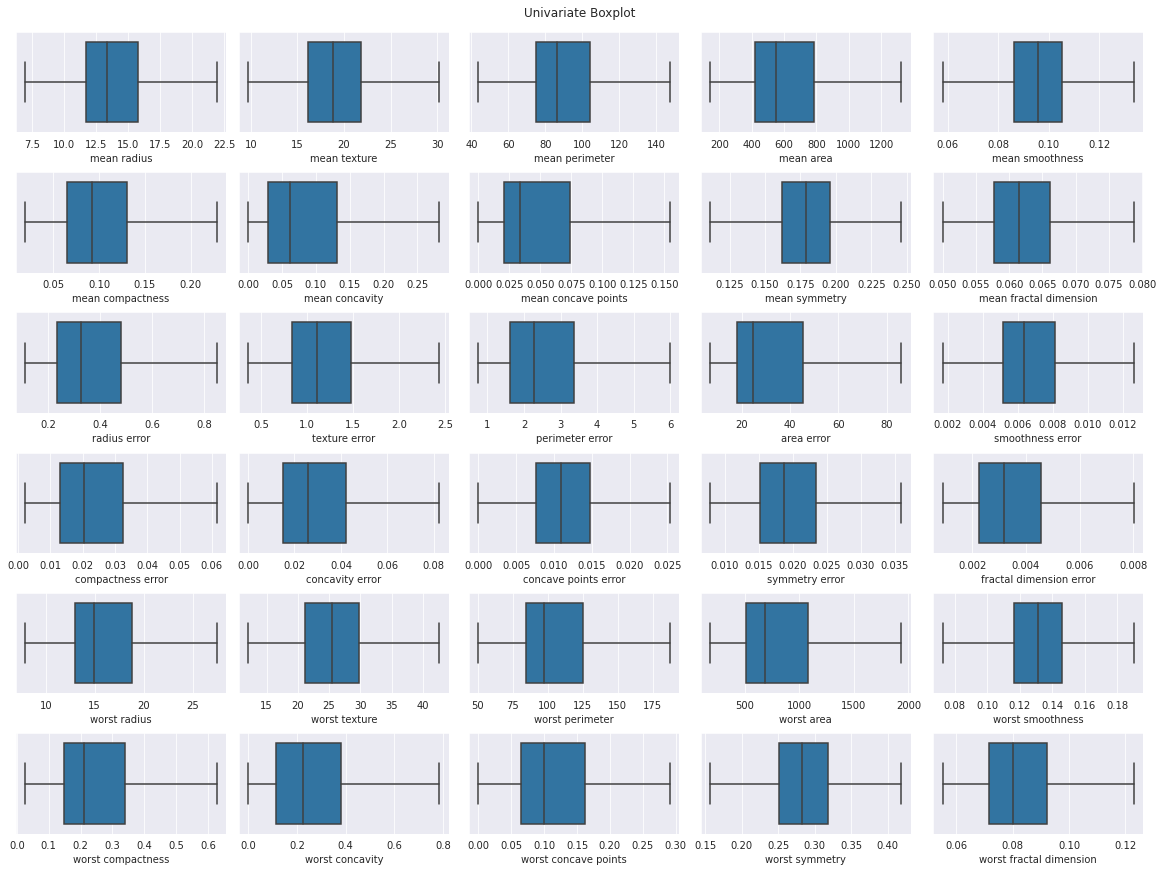

In [ ]:
# check outlier with boxplot
fig, ax = plt.subplots(nrows=6, ncols=5, figsize=(16, 12), constrained_layout=True)
plt.suptitle("Univariate Boxplot")
ax = ax.flatten()
colbox = df_breast_cancer.iloc[:, :30]
for i, j in enumerate(colbox):
    sns.boxplot(x=df_breast_cancer[j], ax=ax[i])

In [ ]:
df_breast_cancer

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.118400,0.22862,0.28241,0.14710,0.2419,0.07871,...,17.33,184.60,1937.05,0.16220,0.62695,0.7119,0.2654,0.41915,0.11890,0
1,20.57,17.77,132.90,1326.0,0.084740,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1937.05,0.12380,0.18660,0.2416,0.1860,0.27500,0.08902,0
2,19.69,21.25,130.00,1203.0,0.109600,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.00,0.14440,0.42450,0.4504,0.2430,0.36130,0.08758,0
3,11.42,20.38,77.58,386.1,0.133695,0.22862,0.24140,0.10520,0.2464,0.07875,...,26.50,98.87,567.70,0.19010,0.62695,0.6869,0.2575,0.41915,0.12301,0
4,20.29,14.34,135.10,1297.0,0.100300,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.00,0.13740,0.20500,0.4000,0.1625,0.23640,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1326.3,0.111000,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,1937.05,0.14100,0.21130,0.4107,0.2216,0.20600,0.07115,0
565,20.13,28.25,131.20,1261.0,0.097800,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.00,0.11660,0.19220,0.3215,0.1628,0.25720,0.06637,0
566,16.60,28.08,108.30,858.1,0.084550,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.00,0.11390,0.30940,0.3403,0.1418,0.22180,0.07820,0
567,20.60,29.33,140.10,1265.0,0.117800,0.22862,0.28241,0.15200,0.2397,0.07016,...,39.42,184.60,1821.00,0.16500,0.62695,0.7855,0.2650,0.40870,0.12301,0


In [ ]:
# Scaling
from sklearn.preprocessing import MinMaxScaler

df_copy = df_breast_cancer.copy()
columns = list(df_copy.iloc[:, :-1].columns)

sc = MinMaxScaler()
sc.fit(df_copy[columns])
df_copy_scaled = sc.transform(df_copy[columns])
df_copy.iloc[:, :-1] = df_copy_scaled
df_breast_cancer_scaled = df_copy
df_breast_cancer_scaled

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,0.737918,0.032627,0.761873,0.724975,0.798006,1.000000,1.000000,0.951888,0.966716,0.998611,...,0.173190,0.980026,1.000000,0.762755,1.000000,0.906302,0.912027,1.000000,0.939532,0
1,0.910852,0.392501,0.859264,0.999746,0.353473,0.283215,0.307709,0.454072,0.517751,0.233067,...,0.371494,0.791601,1.000000,0.436224,0.265667,0.307575,0.639175,0.451171,0.499926,0
2,0.851867,0.561967,0.831300,0.895756,0.681788,0.671573,0.698984,0.827644,0.707840,0.348385,...,0.440639,0.745591,0.869823,0.611395,0.662392,0.573393,0.835052,0.779745,0.478741,0
3,0.297540,0.519601,0.325828,0.205107,1.000000,1.000000,0.854786,0.680752,1.000000,1.000000,...,0.472277,0.353916,0.218341,1.000000,1.000000,0.874475,0.884880,1.000000,1.000000,0
4,0.892084,0.225469,0.880478,0.975228,0.558967,0.542057,0.701108,0.674928,0.515533,0.308093,...,0.151663,0.743400,0.793333,0.551871,0.296351,0.509230,0.558419,0.304207,0.319847,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.977210,0.617482,0.947013,1.000000,0.700277,0.461288,0.863638,0.898826,0.454142,0.217784,...,0.469015,0.844915,1.000000,0.582483,0.306857,0.522852,0.761512,0.188464,0.237016,0
565,0.881359,0.902849,0.842872,0.944792,0.525951,0.401548,0.509897,0.633578,0.473373,0.186523,...,0.855512,0.763849,0.882381,0.375000,0.275006,0.409293,0.559450,0.383400,0.166691,0
566,0.644748,0.894570,0.622053,0.604160,0.350964,0.396291,0.327573,0.343094,0.353550,0.226468,...,0.720809,0.557166,0.535891,0.352041,0.470450,0.433227,0.487285,0.248620,0.340739,0
567,0.912863,0.955442,0.928692,0.948174,0.790082,1.000000,1.000000,0.983596,0.950444,0.701633,...,0.893673,0.980026,0.933756,0.786565,1.000000,1.000000,0.910653,0.960213,1.000000,0


#### ***Modelling***

In [ ]:
def PerceptronModelClassifier(X, Y, test):
  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = test, random_state = 42)
  ppn = Perceptron(eta0=0.1, random_state=42)
  ppn.fit(X_train, y_train)
  y_pred = ppn.predict(X_test)
  print(f"Accuracy with test size {test} : {accuracy_score(y_test, y_pred):.3f}")

In [ ]:
def BaggingModelClassifier(X, Y, estimator):
  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)
  ppn = Perceptron(eta0=0.1, random_state=42)
  bc = BaggingClassifier(base_estimator=ppn, n_estimators=estimator, n_jobs=-1)
  bc.fit(X_train, y_train)
  y_pred = bc.predict(X_test)
  print(f"Accuracy with n_estimator {estimator} : {accuracy_score(y_test, y_pred):.3f}")

#### ***Evaluasi***

##### ***Perceptron***

In [ ]:
# Perceptron
X = df_breast_cancer_scaled.drop(['target'], axis = 1)
Y = df_breast_cancer_scaled['target']
PerceptronModelClassifier(X, Y, 0.2)
PerceptronModelClassifier(X, Y, 0.3)
PerceptronModelClassifier(X, Y, 0.4)

Accuracy with test size 0.2 : 0.974
Accuracy with test size 0.3 : 0.982
Accuracy with test size 0.4 : 0.921


##### ***Bagging***

In [ ]:
# Bagging
X = df_breast_cancer_scaled.drop(['target'], axis = 1)
Y = df_breast_cancer_scaled['target']
BaggingModelClassifier(X, Y, 100)
BaggingModelClassifier(X, Y, 200)
BaggingModelClassifier(X, Y, 300)

Accuracy with n_estimator 100 : 0.971
Accuracy with n_estimator 200 : 0.977
Accuracy with n_estimator 300 : 0.977
